In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.duplicated().sum()

0

In [6]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [8]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [11]:
x = df.drop(columns = ['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [12]:
x_train.shape

(8000, 11)

In [13]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,628,29,3,113146.98,2,0,1,124749.08,True,False,True
5140,626,29,4,105767.28,2,0,0,41104.82,False,False,False
2568,612,47,6,130024.87,1,1,1,45750.21,True,False,False
3671,646,52,6,111739.40,2,0,1,68367.18,True,False,False
7427,714,33,8,122017.19,1,0,0,162515.17,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...
2895,621,47,7,107363.29,1,1,1,66799.28,True,False,True
7813,684,63,3,81245.79,1,1,0,69643.31,True,False,False
905,672,45,9,0.00,1,1,1,92027.69,False,False,False
5192,663,39,8,0.00,2,1,1,101168.90,False,False,False


In [14]:
x_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9953,550,47,2,0.00,2,1,1,97057.28,False,False,True
3850,680,34,3,143292.95,1,1,0,66526.01,False,False,True
4962,531,42,2,0.00,2,0,1,90537.47,False,False,False
3886,710,34,8,147833.30,2,0,1,1561.58,True,False,True
5437,543,30,6,73481.05,1,1,1,176692.65,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
3919,763,39,7,0.00,2,1,0,19458.75,False,True,False
162,800,49,7,108007.36,1,0,0,47125.11,False,False,False
7903,567,34,10,0.00,2,0,1,161571.79,False,True,True
2242,621,30,2,101014.08,2,1,1,165257.31,True,False,False


In [15]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [16]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [18]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2024-02-03 16:19:09.058738: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-03 16:19:09.058870: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-03 16:19:09.219911: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [19]:
model = Sequential()

#model.add(Dense(3,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
#Model Compilation Loss Function
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [22]:
#Increade Epochs
history = model.fit(x_train_scaled,y_train,epochs=100,validation_split = 0.2)

Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 0.4821 - accuracy: 0.7972 - val_loss: 0.4630 - val_accuracy: 0.7975
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4496 - accuracy: 0.7972 - val_loss: 0.4459 - val_accuracy: 0.7975
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4366 - accuracy: 0.7970 - val_loss: 0.4351 - val_accuracy: 0.8006
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4281 - accuracy: 0.8028 - val_loss: 0.4268 - val_accuracy: 0.8069
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4207 - accuracy: 0.8134 - val_loss: 0.4189 - val_accuracy: 0.8175
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.8214 - val_loss: 0.4111 - val_accuracy: 0.8181
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4035 - accuracy: 0.8316 - val_loss: 0.3978 - val_accuracy: 0.8319

In [23]:
import matplotlib.pyplot as plt


In [24]:
history.history

{'loss': [0.4821400046348572,
  0.4496281147003174,
  0.436637282371521,
  0.4281362295150757,
  0.42067623138427734,
  0.4126754105091095,
  0.4034580886363983,
  0.3923751413822174,
  0.3805811405181885,
  0.369782418012619,
  0.36152732372283936,
  0.3560445308685303,
  0.3521973490715027,
  0.3495989739894867,
  0.3473994731903076,
  0.34583163261413574,
  0.34409627318382263,
  0.3431238532066345,
  0.3426263928413391,
  0.34194618463516235,
  0.34069928526878357,
  0.340119332075119,
  0.33940890431404114,
  0.33846190571784973,
  0.33765584230422974,
  0.3374837040901184,
  0.3371993601322174,
  0.33692076802253723,
  0.3361224830150604,
  0.3358396887779236,
  0.33481499552726746,
  0.3348109722137451,
  0.33506539463996887,
  0.3338858485221863,
  0.33321627974510193,
  0.3338451087474823,
  0.33246663212776184,
  0.33219000697135925,
  0.331946462392807,
  0.3315657377243042,
  0.3309321105480194,
  0.3309512734413147,
  0.33021917939186096,
  0.3303389847278595,
  0.32994076

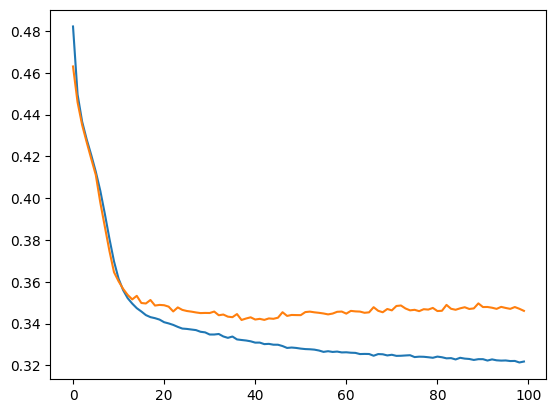

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

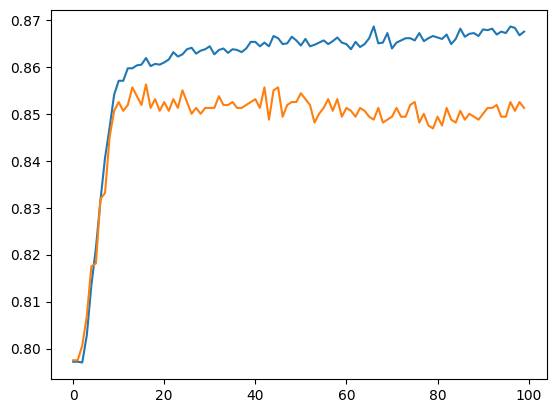

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [27]:
model.layers[0].get_weights()

[array([[-3.46412033e-01, -4.42661673e-01,  2.63014492e-02,
          3.60859007e-01,  6.05865598e-01, -7.28476122e-02,
          1.73106343e-01, -1.01301394e-01, -4.04657796e-02,
         -8.05912465e-02, -2.06618696e-01],
        [-6.83616161e-01, -1.11883812e-01, -1.60900697e-01,
         -5.21729350e-01, -3.12711686e-01,  6.56627774e-01,
          4.21926565e-02,  9.94766235e-01,  6.78519249e-01,
         -7.22566068e-01, -3.53366673e-01],
        [ 1.07402494e-02,  5.97152054e-01,  2.31778119e-02,
         -4.95958179e-01, -1.10318452e-01,  1.76260725e-01,
         -1.29792318e-01,  4.94338796e-02,  4.89658851e-04,
          3.65006626e-02,  1.66456979e-02],
        [ 8.50826353e-02, -2.95365185e-01, -9.87853229e-01,
         -9.41469297e-02, -1.07409675e-02, -1.75941795e-01,
         -2.85244375e-01, -5.16317368e-01, -1.45728528e-01,
         -1.63915738e-01, -2.65655965e-02],
        [ 5.61180532e-01, -1.08930647e-01,  6.32773638e-02,
         -2.57047445e-01,  1.86436981e-01, -

In [28]:
y_log = model.predict(x_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [29]:
y_pred = np.where(y_log>0.5,1,0)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8615